Code to make comparison plots for SoLID SIDIS
Last update: 12/29/2020

In [2]:
import sys, os
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
matplotlib.rc('text',usetex=True)
%matplotlib inline
import tmdlib.tmd as tmd

# Load fit results

In [5]:
par = {}
par['world'] = pd.read_csv('outputcollins/out-world.dat', delim_whitespace=True, index_col=False)
par['sbs'] = pd.read_csv('outputcollins/out-sbs.dat', delim_whitespace=True, index_col=False)
par['clas'] = pd.read_csv('outputcollins/out-clas.dat', delim_whitespace=True, index_col=False)
par['sbs+clas'] = pd.read_csv('outputcollins/out-sbsclas.dat', delim_whitespace=True, index_col=False)
par['base'] = pd.read_csv('outputcollins/out-base.dat', delim_whitespace=True, index_col=False)
par['basesyst'] = pd.read_csv('outputcollins/out-basesyst.dat', delim_whitespace=True, index_col=False)
par['enhanced'] = pd.read_csv('outputcollins/out-enhanced.dat', delim_whitespace=True, index_col=False)
par['enhancedsyst'] = pd.read_csv('outputcollins/out-enhancedsyst.dat', delim_whitespace=True, index_col=False)
par['sbs+clas+base'] = pd.read_csv('outputcollins/out-sbsclasbase.dat', delim_whitespace=True, index_col=False)
par['sbs+clas+basesyst'] = pd.read_csv('outputcollins/out-sbsclasbasesyst.dat', delim_whitespace=True, index_col=False)
par['sbs+clas+enhanced'] = pd.read_csv('outputcollins/out-sbsclasenhanced.dat', delim_whitespace=True, index_col=False)
par['sbs+clas+enhancedsyst'] = pd.read_csv('outputcollins/out-sbsclasenhancedsyst.dat', delim_whitespace=True, index_col=False)


# Calculate h1

In [33]:
def h1calc(pset,Q2,tol):
    xh1 = pd.DataFrame(columns={})
    X = np.linspace(1e-3,1,200)
    for x in X:
        xu = []
        xd = []
        for i in range(len(pset)):
            h1 = tmd.h1col(x,Q2,'proton',pset.loc[i])
            xu.append(x*h1[2])
            xd.append(x*h1[1])
        xh1 = xh1.append({'x':x,'xu':np.mean(xu),'Exu':tol*np.std(xu),'xd':np.mean(xd),'Exd':tol*np.std(xd)},ignore_index=True)
    return xh1

In [34]:
Q2 = 2.4
tol=7.04

h1 = {}
h1['world'] = h1calc(par['world'],Q2,tol)
h1['sbs'] = h1calc(par['sbs'],Q2,tol)
h1['clas'] = h1calc(par['clas'],Q2,tol)
h1['sbs+clas'] = h1calc(par['sbs+clas'],Q2,tol)
h1['base'] = h1calc(par['base'],Q2,tol)
h1['basesyst'] = h1calc(par['basesyst'],Q2,tol)
h1['enhanced'] = h1calc(par['enhanced'],Q2,tol)
h1['enhancedsyst'] = h1calc(par['enhancedsyst'],Q2,tol)
h1['sbs+clas+base'] = h1calc(par['sbs+clas+base'],Q2,tol)
h1['sbs+clas+basesyst'] = h1calc(par['sbs+clas+basesyst'],Q2,tol)
h1['sbs+clas+enhanced'] = h1calc(par['sbs+clas+enhanced'],Q2,tol)
h1['sbs+clas+enhancedsyst'] = h1calc(par['sbs+clas+enhancedsyst'],Q2,tol)

# Plots

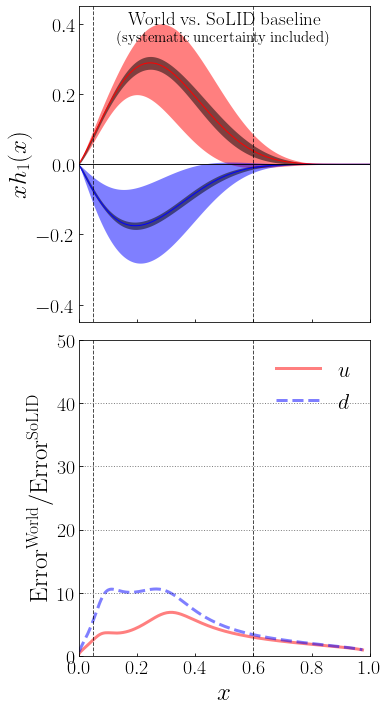

In [88]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['world'], h1['basesyst']
ylabel = r'$\rm Error^{World}/Error^{SoLID}$'
title1 = r'$\rm World~vs.~SoLID~baseline$'
title2 = r'$\rm (systematic~uncertainty~included)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,1)
ax.set_ylim(-0.45,0.45)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)


ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=10, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=20, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=30, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=40, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,1)
ax.set_ylim(0,50)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-world-basesyst.pdf')

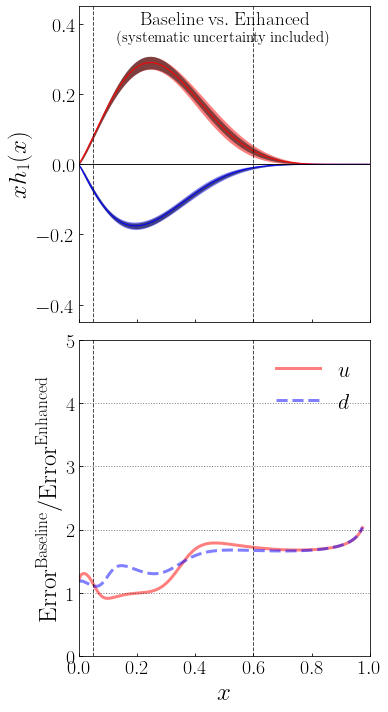

In [89]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['basesyst'], h1['enhancedsyst']
ylabel = r'$\rm Error^{Baseline}/Error^{Enhanced}$'
title1 = r'$\rm Baseline~vs.~Enhanced$'
title2 = r'$\rm (systematic~uncertainty~included)$'


ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,1)
ax.set_ylim(-0.45,0.45)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)

ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=1, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=2, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=3, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=4, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,1)
ax.set_ylim(0,5)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-basesyst-enhanced.pdf')

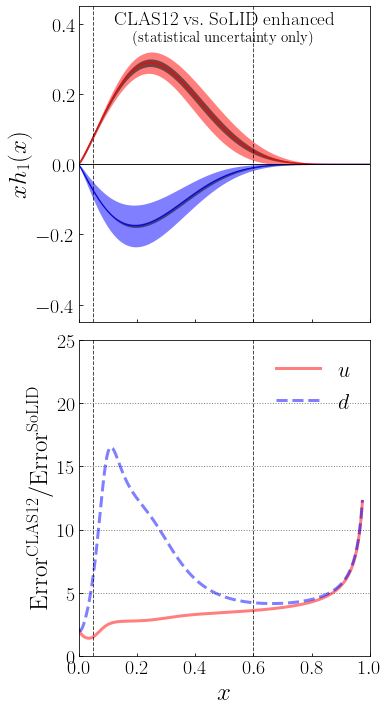

In [90]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['clas'], h1['enhanced']
ylabel = r'$\rm Error^{CLAS12}/Error^{SoLID}$'
title1 = r'$\rm CLAS12~vs.~SoLID~enhanced$'
title2 = r'$\rm (statistical~uncertainty~only)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,1)
ax.set_ylim(-0.45,0.45)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)



ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=5, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=10, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=15, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=20, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,1)
ax.set_ylim(0,25)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-clas-enhanced.pdf')

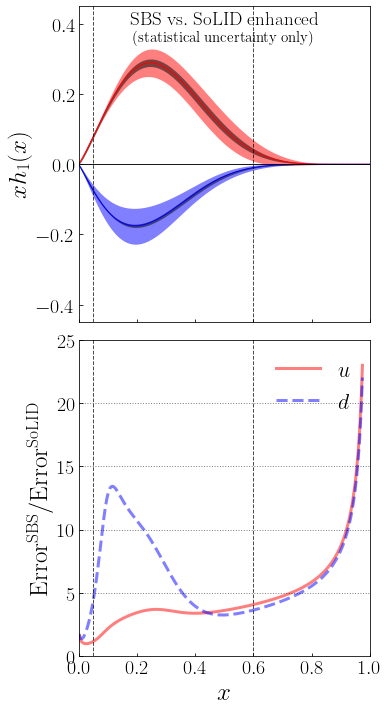

In [91]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['sbs'], h1['enhanced']
ylabel = r'$\rm Error^{SBS}/Error^{SoLID}$'
title1 = r'$\rm SBS~vs.~SoLID~enhanced$'
title2 = r'$\rm (statistical~uncertainty~only)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,1)
ax.set_ylim(-0.45,0.45)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)



ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=5, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=10, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=15, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=20, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,1)
ax.set_ylim(0,25)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-sbs-enhanced.pdf')

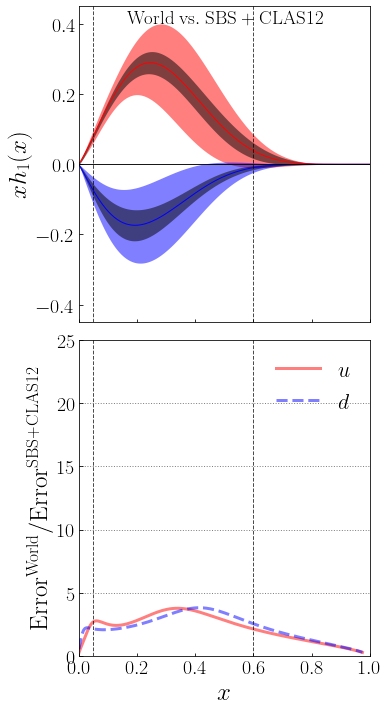

In [92]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['world'], h1['sbs+clas']
ylabel = r'$\rm Error^{World}/Error^{SBS+CLAS12}$'
title1 = r'$\rm World~vs.~SBS+CLAS12$'
title2 = r'$\rm $'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,1)
ax.set_ylim(-0.45,0.45)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)



ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=5, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=10, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=15, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=20, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,1)
ax.set_ylim(0,25)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-world-sbsclas.pdf')

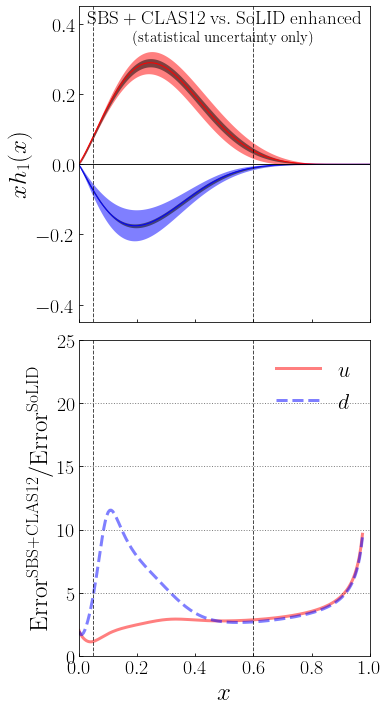

In [93]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['sbs+clas'], h1['sbs+clas+enhanced']
ylabel = r'$\rm Error^{SBS+CLAS12}/Error^{SoLID}$'
title1 = r'$\rm SBS+CLAS12~vs.~SoLID~enhanced$'
title2 = r'$\rm (statistical~uncertainty~only)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,1)
ax.set_ylim(-0.45,0.45)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)



ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=5, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=10, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=15, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=20, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,1)
ax.set_ylim(0,25)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-sbsclas-sbsclasenhanced.pdf')

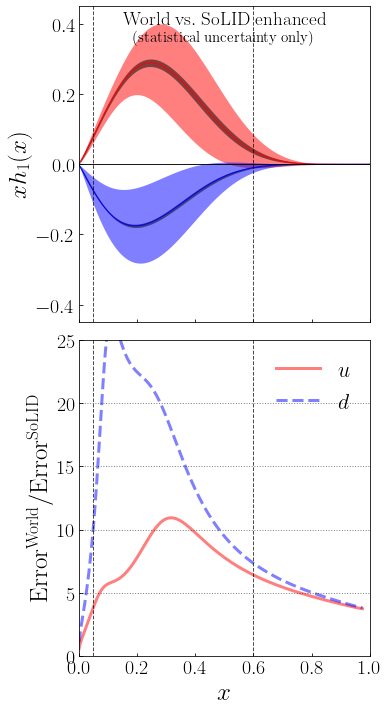

In [94]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['world'], h1['enhanced']
ylabel = r'$\rm Error^{World}/Error^{SoLID}$'
title1 = r'$\rm World~vs.~SoLID~enhanced$'
title2 = r'$\rm (statistical~uncertainty~only)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,1)
ax.set_ylim(-0.45,0.45)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)



ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=5, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=10, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=15, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=20, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,1)
ax.set_ylim(0,25)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-world-enhanced.pdf')

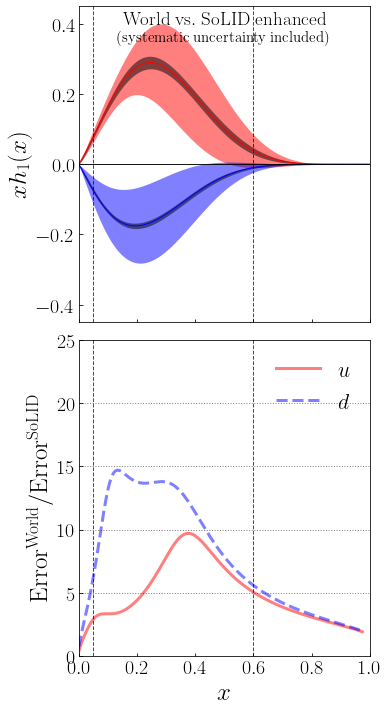

In [95]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['world'], h1['enhancedsyst']
ylabel = r'$\rm Error^{World}/Error^{SoLID}$'
title1 = r'$\rm World~vs.~SoLID~enhanced$'
title2 = r'$\rm (systematic~uncertainty~included)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,1)
ax.set_ylim(-0.45,0.45)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)



ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=5, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=10, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=15, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=20, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,1)
ax.set_ylim(0,25)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-world-enhancedsyst.pdf')